## Handling Imbalance data set

#### 1- Up Sampling
#### 2- Down Sampling

In [55]:
import numpy as np

In [56]:
import pandas as pd

In [99]:
import seaborn as sns

In [57]:
# Set the random seed for the reproducibility
np.random.seed(123)

#Create data frame with two classes
n_sample=1000
class_0_ratio=0.9
n_class_0=int(n_sample*class_0_ratio)
n_class_1=n_sample-n_class_0

In [58]:
n_class_0,n_class_1

(900, 100)

In [59]:
class_0=pd.DataFrame({
    'feature_1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2':np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0]*n_class_0
})

class_1=pd.DataFrame({
    'feature_1':np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature_2':np.random.normal(loc=2,scale=1,size=n_class_1),
    'target':[1]*n_class_1
})



In [60]:
class_0

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
895,0.238761,-0.003155,0
896,-1.106386,-0.430660,0
897,0.366732,-0.146416,0
898,1.023906,1.160176,0


In [61]:
class_1.head()

,feature_1,feature_2,target
0,1.699768,2.139033,1
1,1.367739,2.025577,1
2,1.795683,1.803557,1
3,2.213696,3.312255,1
4,3.033878,3.187417,1


In [62]:
df=pd.concat([class_1,class_0]).reset_index(drop=True)

<Axes: xlabel='feature_1', ylabel='feature_2'>

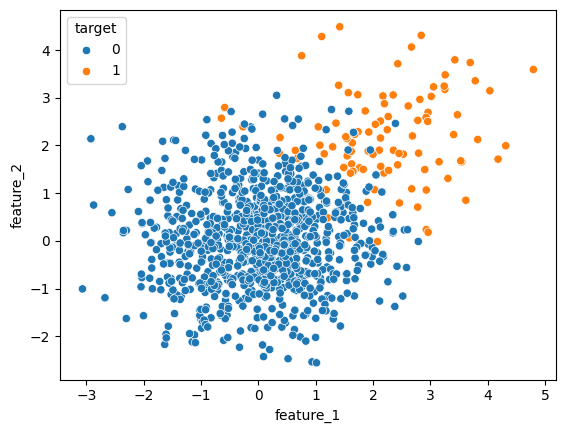

In [106]:
sns.scatterplot(x='feature_1',y='feature_2',data=df,hue='target')

In [63]:
df.head()

,feature_1,feature_2,target
0,1.699768,2.139033,1
1,1.367739,2.025577,1
2,1.795683,1.803557,1
3,2.213696,3.312255,1
4,3.033878,3.187417,1


In [64]:
df.sum()

feature_1    183.458463
feature_2    185.366568
target       100.000000
dtype: float64

In [65]:
df.count()

feature_1    1000
feature_2    1000
target       1000
dtype: int64

In [66]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

### UpSampling

In [67]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [68]:
df_minority.head()

,feature_1,feature_2,target
0,1.699768,2.139033,1
1,1.367739,2.025577,1
2,1.795683,1.803557,1
3,2.213696,3.312255,1
4,3.033878,3.187417,1


In [69]:
df_majority.head()

,feature_1,feature_2,target
100,-1.085631,0.551302,0
101,0.997345,0.419589,0
102,0.282978,1.815652,0
103,-1.506295,-0.252750,0
104,-0.578600,-0.292004,0


In [70]:
df_minority.count(),df_majority.count()

(feature_1    100
 feature_2    100
 target       100
 dtype: int64,
 feature_1    900
 feature_2    900
 target       900
 dtype: int64)

In [71]:
## upsampling
from sklearn.utils import resample

In [72]:
df_minority_upsample=resample(df_minority,
                              replace=True,# sample with replacement
                              n_samples=len(df_majority),# to match the majority value
                              random_state=42
                              )

In [73]:
df_minority_upsample.shape

(900, 3)

In [74]:
df_minority_upsample.head()

,feature_1,feature_2,target
51,1.125854,1.843917,1
92,2.196570,1.397425,1
14,1.932170,2.998053,1
71,2.272825,3.034197,1
60,2.870056,1.550485,1


In [75]:
df_minority_upsample.value_counts()

feature_1  feature_2  target
1.005190   1.110089   1         19
1.915470   1.652041   1         18
3.701608   2.160889   1         18
2.902006   0.390305   1         16
3.013493   2.047240   1         16
                                ..
2.549697   3.095922   1          4
2.013560   2.847260   1          4
2.995595   2.475934   1          4
0.988356   1.835125   1          4
1.245992   2.946908   1          3
Name: count, Length: 100, dtype: int64

In [76]:
df_minority_upsample['target'].value_counts()

target
1    900
Name: count, dtype: int64

In [77]:
df_minority_upsample['target'].value_counts()

target
1    900
Name: count, dtype: int64

In [81]:
df_upsample=pd.concat([df_majority,df_minority_upsample]).reset_index(drop=True)

<Axes: xlabel='feature_1', ylabel='feature_2'>

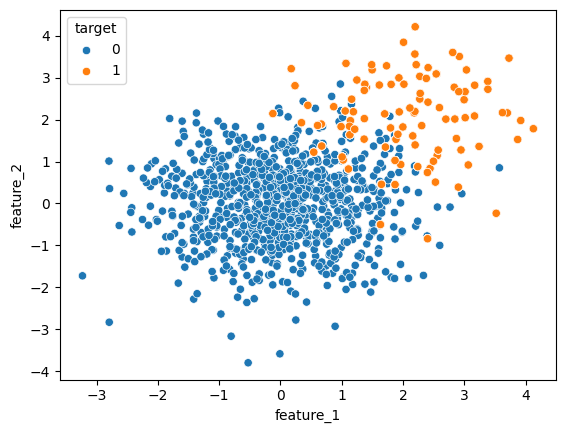

In [108]:
sns.scatterplot(x='feature_1',y='feature_2',data=df_upsample,hue='target')

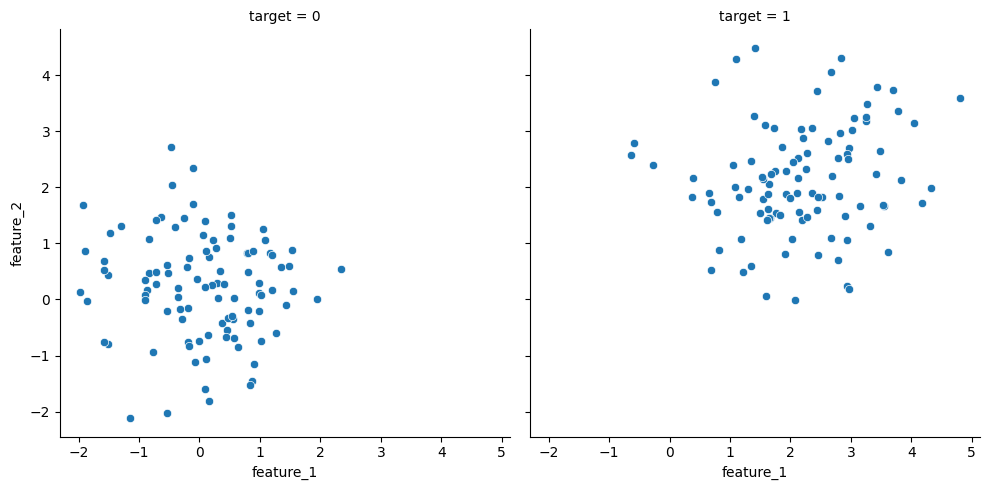

In [110]:
sns.relplot(x='feature_1',y='feature_2',data=df_downsample,col='target')

In [82]:
df_upsample

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
1795,1.188902,2.189189,1
1796,3.919526,1.980541,1
1797,2.810326,3.604614,1
1798,3.621531,2.168229,1


In [83]:
df_upsample['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [84]:
df_upsample.tail()

,feature_1,feature_2,target
1795,1.188902,2.189189,1
1796,3.919526,1.980541,1
1797,2.810326,3.604614,1
1798,3.621531,2.168229,1
1799,1.160887,2.489203,1


In [85]:
df_upsample.shape

(1800, 3)

### Dwon Sampling

In [86]:
class_0=pd.DataFrame({
    'feature_1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2':np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0]*n_class_0
})

class_1=pd.DataFrame({
    'feature_1':np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature_2':np.random.normal(loc=2,scale=1,size=n_class_1),
    'target':[1]*n_class_1
})



In [87]:
df=pd.concat([class_1,class_0]).reset_index(drop=True)

In [88]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [90]:
df_majority_downsample=resample(df_majority,
                              replace=False,# sample with replacement
                              n_samples=len(df_minority),# to match the minority value
                              random_state=42
                              )

In [91]:
df_majority_downsample

,feature_1,feature_2,target
170,0.786057,0.830076,0
927,-0.859775,0.174732,0
331,-0.012870,-0.735348,0
688,-0.297331,-0.351224,0
139,0.528702,1.508257,0
...,...,...,...
498,1.013666,0.083496,0
176,0.164480,-1.808980,0
296,-1.576624,0.525893,0
731,-0.540147,0.610282,0


In [92]:
df_majority_downsample.shape

(100, 3)

In [93]:
df_downsample=pd.concat([df_minority,df_majority_downsample]).reset_index(drop=True)

<Axes: xlabel='feature_1', ylabel='feature_2'>

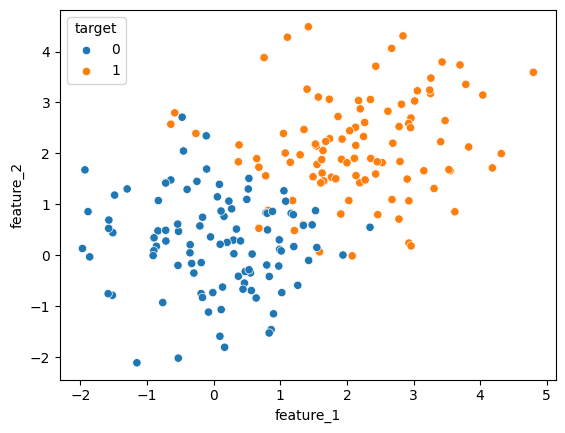

In [107]:
sns.scatterplot(x='feature_1',y='feature_2',data=df_downsample,hue='target')

In [97]:
df_downsample['target'].value_counts()

target
1    100
0    100
Name: count, dtype: int64